In [30]:
from ast import literal_eval

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from statsmodels.graphics.mosaicplot import mosaic
import seaborn as sns
from scipy.stats import entropy
from sklearn.metrics import mutual_info_score
%matplotlib inline

from math import ceil

from matplotlib import pyplot as plt
from matplotlib.patches import Rectangle as rectangle
import matplotlib.image as mpimg
import numpy as np
import pandas as pd
from rectpack import newPacker, PackingBin

In [25]:
def generate_plot(cols, size, bins=20):
    plt.figure(figsize=(size, size))
    if len(cols) == 1:
        col1 = cols[0]
        plt.hist(data[col1], bins)
        plt.xlabel(col1)
        plt.title(col1 + " Histogram")
        filename = col1 + '.png'
        plt.savefig(filename)
    else:
        col1 = cols[0]
        col2 = cols[1]
        plt.plot(data[col1], data[col2], 'o')
        plt.xlabel(col1)
        plt.ylabel(col2)
        plt.title(col1 + " impact on " + col2)
        filename = col1 + '_' + col2 + '.png'
        plt.savefig(filename)
    plt.show()
    return filename

In [26]:
cols = [
    'Country',
    'Quality of Life Index',
    'Purchasing Power Index',
    'Safety Index',
    'Health Care Index',
    'Cost of Living Index',
    'Property Price to Income Ratio',
    'Traffic Commute Time Index',
    'Pollution Index',
    'Climate Index',
]

data = pd.read_csv('country_data.csv', '\t', header=None).set_index(0)
data.columns = cols

In [27]:
with open('importance', 'r') as f:
    importance = literal_eval(f.readlines()[0])

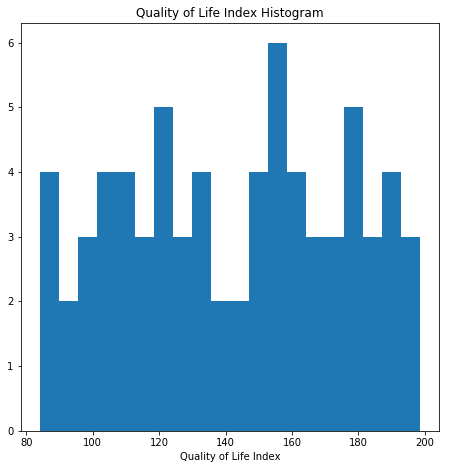

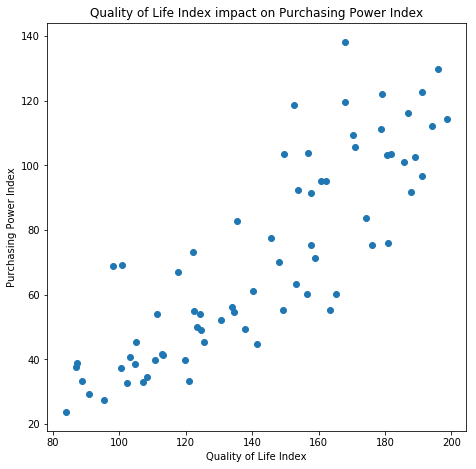

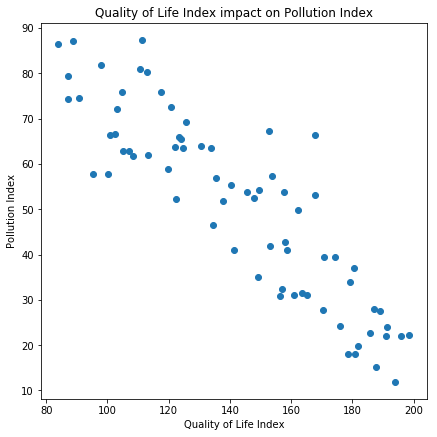

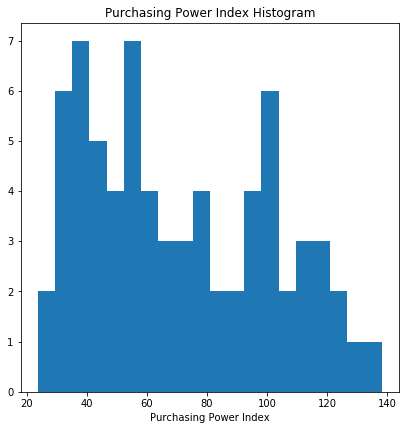

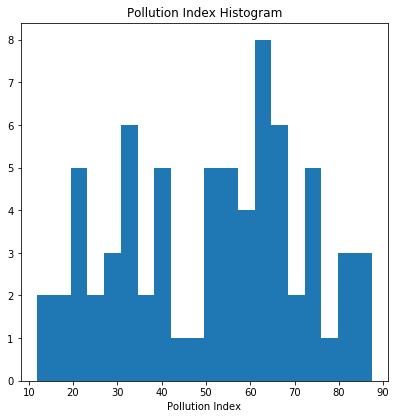

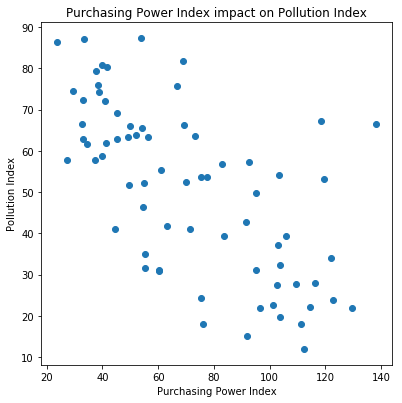

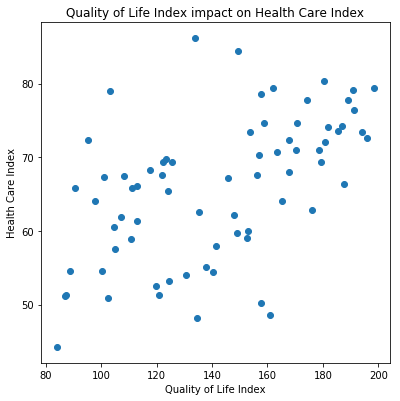

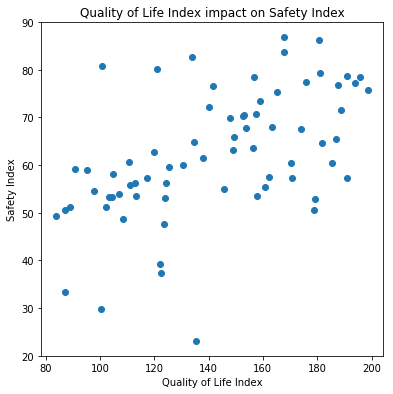

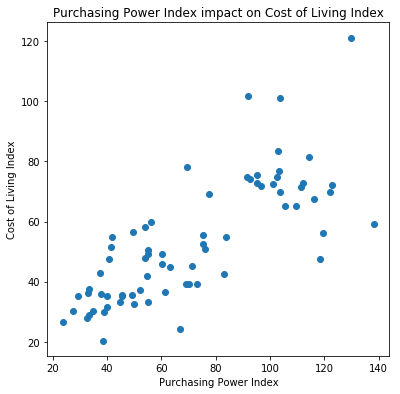

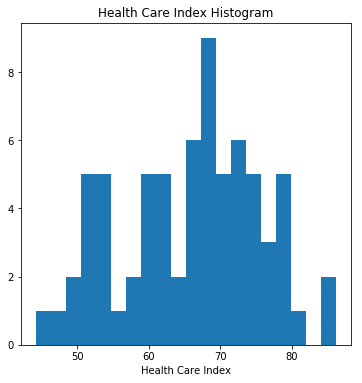

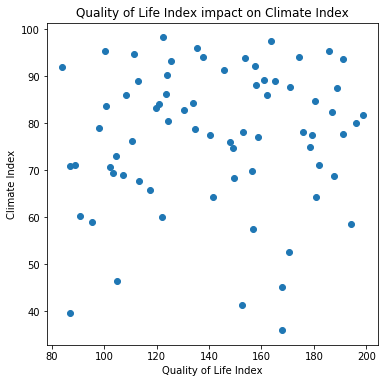

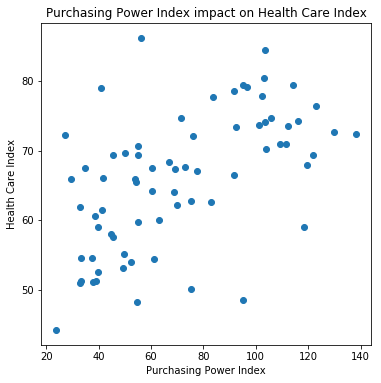

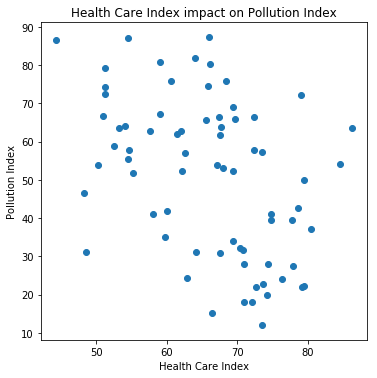

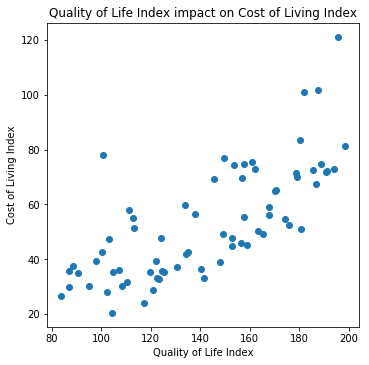

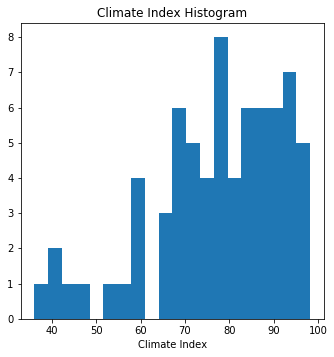

In [44]:
sizes = {}
min_imp = 0.7
max_plot_size = 7.5
max_rect_size = 4
for i, (cols, imp) in enumerate(importance):
    if imp > min_imp:
        size = imp * max_plot_size
        filename = generate_plot(cols, size)
        sizes[filename] = (imp - min_imp)/(1 - min_imp) * max_rect_size

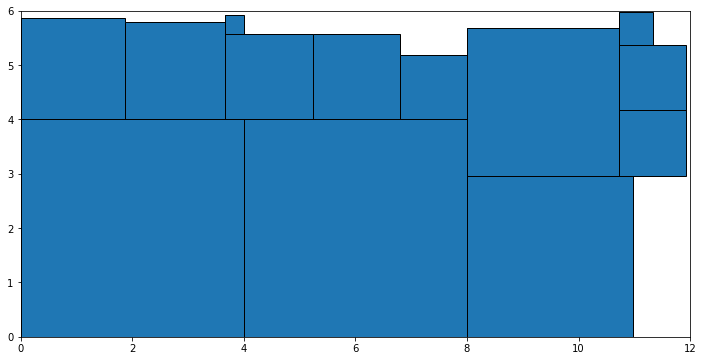

In [45]:
rectangles = []
area = 0
# for i in range(10):
#     height = np.random.randint(2, 5)
#     rectangles.append((height, height))
#     area += height**2
for val in sizes.values():
    rectangles.append((val, val))
    area += val**2
bins = [(12, ceil(area/12))]

packer = newPacker(bin_algo=PackingBin.BBF)

# Add the rectangles to packing queue
for r in rectangles:
    packer.add_rect(*r)

# Add the bins where the rectangles will be placed
for b in bins:
    packer.add_bin(*b)

# Start packing
packer.pack()

fig, ax = plt.subplots(1, figsize=bins[0])
ax.set_xlim([0, bins[0][0]])
ax.set_ylim([0, bins[0][1]])
for rect in packer[0]:
    ax.add_patch(rectangle((rect.x, rect.y), rect.height, rect.width, alpha=1))
    ax.add_patch(rectangle((rect.x, rect.y), rect.height, rect.width, fill=None, alpha=1))
plt.show()